<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>
    
Thank you for the updates! My new comments have digit 2. 
    
    
I do not have any questions, so I can accept the project now. 
    
    
If you are interested in this topic, please take a look at the small [Time Series Course](https://www.kaggle.com/learn/time-series) on Kaggle. There are just several lessons there, and in the end of this course you will apply your knowledge on the sales dataset that is provided for the ongoing [Store Sales Time Series Forecasting Competition](https://www.kaggle.com/competitions/store-sales-time-series-forecasting) with no rewards except for knowledge :) You can use their dataset for your practice and you can submit your notebook to run the model on the hidden test subset.     
    
    
Congratulations and good luck! 
    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Somil, I am a reviewer on this project. Congratulations on submitting another project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    

   
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    
    
- You have successfully investigated the data we have; 
    
    
    
- It's great that you used `statsmodels` to analyze time series as it provides comprehensive summaries that can be useful when we need to make data-driven decisions;


- Prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    


- Trained and compared several models. It is not enough to just train a model. We also need to analyze the results and compare different models. Very good! 


- Tuned hyperparameters. We tune them to identify the best model that will yield the desired metric value;


- Wrote an excellent conclusion! A well-written conclusion shows how the project met its objectives and provides a concise and understandable summary for those who may not have been involved in the details of the project. Good job! 

</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. 
 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved.
    
There is only one issue that needs tp be fix. Please use the `TimeSeriesSplit` class. Unlike standard k-fold cross-validation, which randomly splits data into folds, TimeSeriesSplit ensures that the training set always contains data that precedes the validation set. 
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> you did a great job here, thank you so much! Actually the project is almost perfect, and the updates should not take much time. If you have any questions, please feel free to ask. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review if you ask me to. 


    
<hr>
    
📌 Please feel free to schedule a 1:1 with our tutors or TAs, join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance. 
</div>

# Taxi Order ML

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction! 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
    

Don't forget about project title :) 

</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import lightgbm as lgb

from pmdarima import auto_arima
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])
df= data.resample('H')['num_orders'].sum()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Resampling is correct! 
    
</div>

## Preparation and Analysis

### Trends/Seasonality

Text(0, 0.5, 'Frequency')

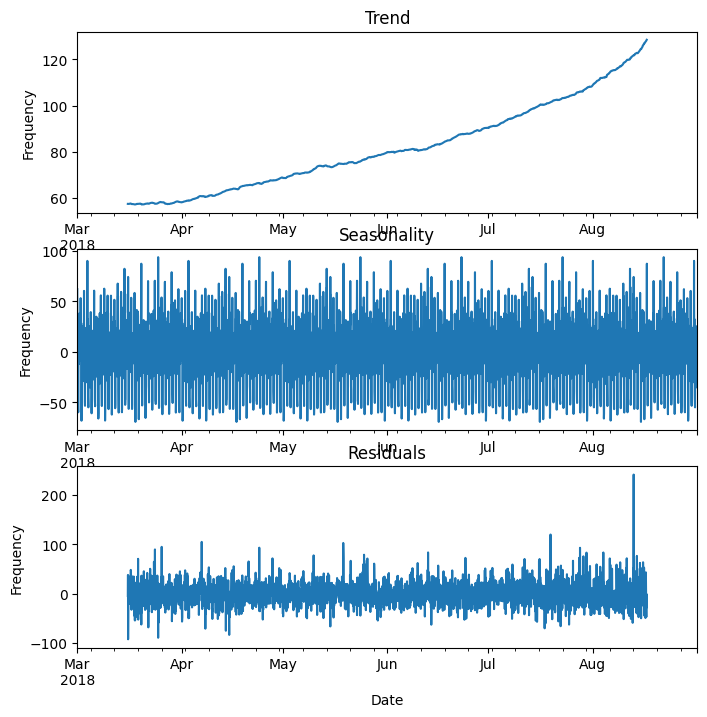

In [3]:
decomposed = seasonal_decompose(df, period=720)

plt.figure(figsize=(8, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Frequency')

Theres an upward trend for the amont of taxi orders as the months progresses. I used a period of 744, 1 month in hours to see how the trend is for the data. For seasonality There is not periodic fluctuations in the data.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
`seasonal_decompose` is a great method, well done! 
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
You can also choose a shorter interval to analyze seasonality. 
    
</div>

### Plot ACF

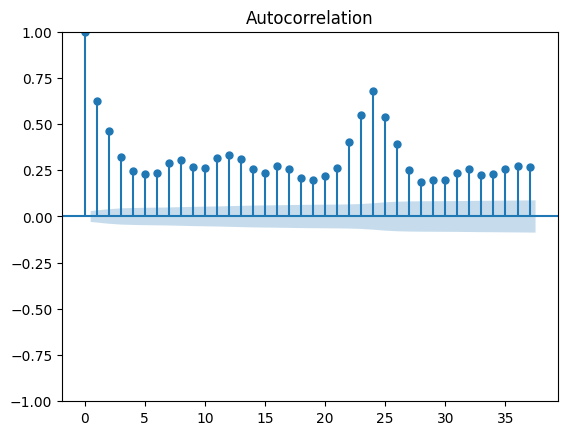

In [4]:
plot_acf(df)
plt.show()

The ACF plot shows the correlation between the time series and lagged versions of itself.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
True.     
</div>

### Plot PACF

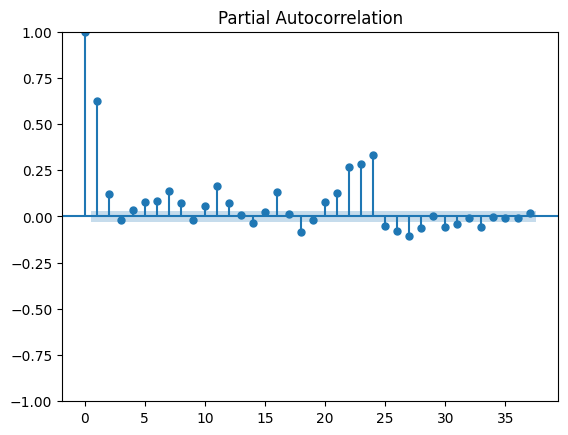

In [5]:
plot_pacf(df)
plt.show()

The PACF plot shows the correlation between the time series and lagged versions of itself, controlling for the effects of intermediate lags. The PACF plot is used for identifying the order of an autoregressive (AR) model. If the PACF plot cuts off at a particular lag, it suggests that an AR model of that order would be appropriate. It looks as though 2 lags is the signifigant amount.

In [6]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values", alpha=0.5)
    plt.legend(loc="upper left")
    plt.grid(True)

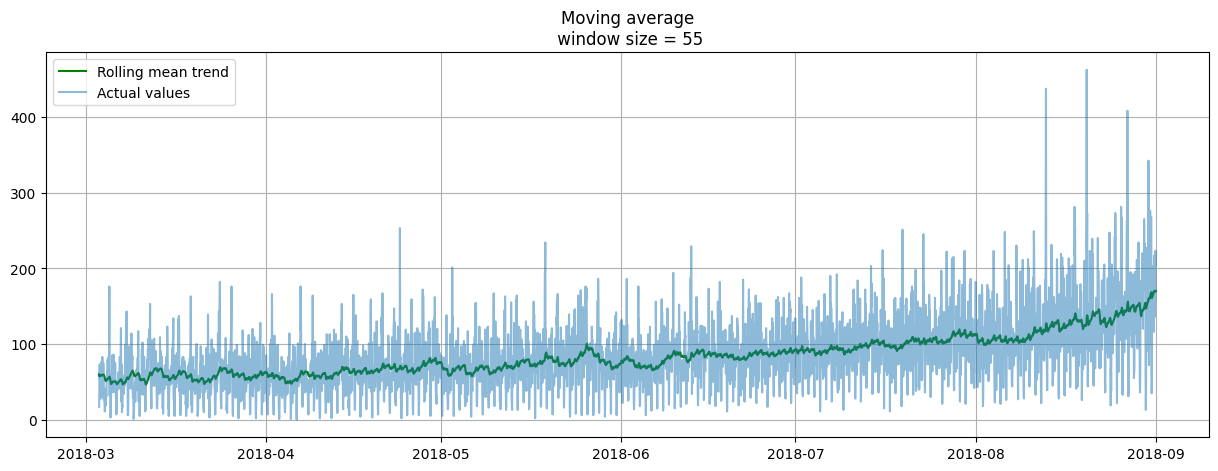

In [7]:
plotMovingAverage(df, 55)

Above is a plot of the rolling mean compared to the actucal values in the moving average. It helps to visualise the data and see how the rolling mean correlates to the actucal amounts.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Great job! </div>

### Creating Features

Created features so the ML model has datapoints.

In [8]:
df = df.reset_index()
df['datetime'] = pd.to_datetime(df['datetime'])

df['hour_of_day'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek
df['week_of_year'] = df['datetime'].dt.isocalendar().week.astype(int)
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['rolling_mean'] = df['num_orders'].rolling(5).mean()

In [9]:
for i in range(1, 3):
    df[f'lag_{i}'] = df['num_orders'].shift(i)

In [10]:
df.shape

(4416, 9)

In [11]:
df

,datetime,num_orders,hour_of_day,day_of_week,week_of_year,is_weekend,rolling_mean,lag_1,lag_2
0,2018-03-01 00:00:00,124,0,3,9,0,NaN,NaN,NaN
1,2018-03-01 01:00:00,85,1,3,9,0,NaN,124.0,NaN
2,2018-03-01 02:00:00,71,2,3,9,0,NaN,85.0,124.0
3,2018-03-01 03:00:00,66,3,3,9,0,NaN,71.0,85.0
4,2018-03-01 04:00:00,43,4,3,9,0,77.8,66.0,71.0
...,...,...,...,...,...,...,...,...,...
4411,2018-08-31 19:00:00,136,19,4,35,0,174.6,207.0,217.0
4412,2018-08-31 20:00:00,154,20,4,35,0,182.2,136.0,207.0
4413,2018-08-31 21:00:00,159,21,4,35,0,174.6,154.0,136.0
4414,2018-08-31 22:00:00,223,22,4,35,0,175.8,159.0,154.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4416 entries, 0 to 4415
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      4416 non-null   datetime64[ns]
 1   num_orders    4416 non-null   int64         
 2   hour_of_day   4416 non-null   int64         
 3   day_of_week   4416 non-null   int64         
 4   week_of_year  4416 non-null   int64         
 5   is_weekend    4416 non-null   int64         
 6   rolling_mean  4412 non-null   float64       
 7   lag_1         4415 non-null   float64       
 8   lag_2         4414 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 310.6 KB


In [13]:
df.shape

(4416, 9)

In [14]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [15]:
df.isna().sum()

datetime        0
num_orders      0
hour_of_day     0
day_of_week     0
week_of_year    0
is_weekend      0
rolling_mean    4
lag_1           1
lag_2           2
dtype: int64

Found NaN values in the dataset after adding columns.

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

datetime        0
num_orders      0
hour_of_day     0
day_of_week     0
week_of_year    0
is_weekend      0
rolling_mean    0
lag_1           0
lag_2           0
dtype: int64

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
This part is also correct. 

</div>

### Finding span of data

In [18]:
df.datetime.min()

Timestamp('2018-03-01 04:00:00')

In [19]:
df.datetime.max()

Timestamp('2018-08-31 23:00:00')

Dataset has data from 2018-3-1 till 2018-8-31. 

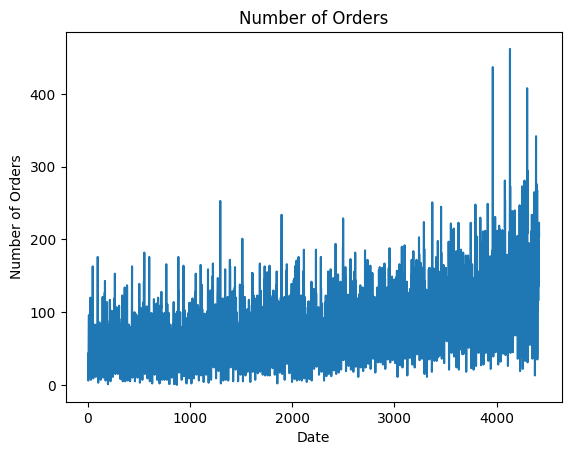

In [20]:
df['num_orders'].plot()
plt.title('Number of Orders')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

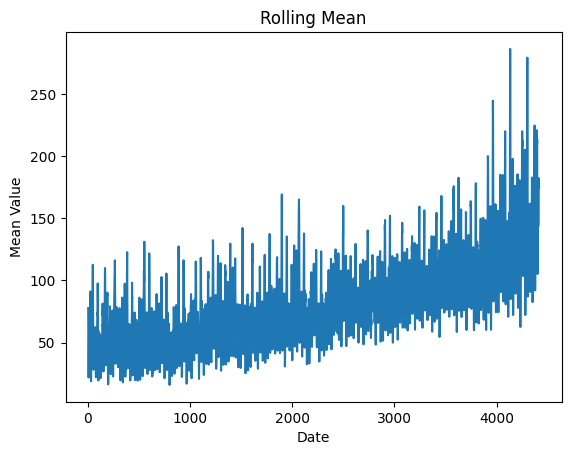

In [21]:
df['rolling_mean'].plot()
plt.title('Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.show()

Taxi demand exhibits strong hourly, daily, and weekly patterns. The predictive models will effectively capture these patterns and provide accurate forecasts. The addition of Lag features and rolling means will significantly improve model performance.

## Training

### Data Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['num_orders', 'datetime'], axis=1), df['num_orders'], shuffle= False, test_size=.1, random_state=12345)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good. 
</div>

### Auto ARIMA

In [23]:
%%time
model = auto_arima(y_train, scoring='mse')
predictions = model.predict(len(y_test))

auto_arima_rmse = mean_squared_error(y_test, predictions, squared=False)
print('RMSE:', auto_arima_rmse.round(3))
print(model.summary())

RMSE: 62.761
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3970
Model:               SARIMAX(0, 1, 1)   Log Likelihood              -19601.128
Date:                Mon, 27 Jan 2025   AIC                          39206.257
Time:                        03:41:59   BIC                          39218.829
Sample:                             0   HQIC                         39210.715
                               - 3970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4879      0.010    -46.855      0.000      -0.508      -0.467
sigma2      1140.3882     20.462     55.732      0.000    1100.283    1180.493
Ljung-Box (L1) (Q):                  35

/opt/conda/envs/python3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


### Linear Regression

In [24]:
%%time
lr = LinearRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)
rmse = mean_squared_error(y_test, predict, squared=False)
print('Linear Regression RMSE:', rmse.round(3))

Linear Regression RMSE: 47.876
CPU times: user 8.45 ms, sys: 73 µs, total: 8.53 ms
Wall time: 66.1 ms


### LightGBM

In [25]:
%%time
lgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 7],
    'num_leaves': [22, 31, 40],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.8, 0.9, 1.0],
}

lgb_model = lgb.LGBMRegressor(metric='rmse',random_state=12345)
tscv = TimeSeriesSplit(n_splits=5)
lgb_grid = GridSearchCV(lgb_model, lgb_params, scoring='neg_root_mean_squared_error', cv=tscv)
lgb_grid.fit(X_train, y_train)

print('Best Hyperparameters:', lgb_grid.best_params_)
print('Best RMSE:', -lgb_grid.best_score_.round(3))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_samples': 5, 'n_estimators': 300, 'num_leaves': 22, 'subsample': 0.8}
Best RMSE: 20.526
CPU times: user 9min 17s, sys: 15 s, total: 9min 32s
Wall time: 9min 32s


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Correct! 
    

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
It's great that you tune hyperparameters! 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
When we work with time series, we have to remember about the correct order in the data. To ensure that the training data always precedes the test data in time, we have to employ the `TimeSeriesSplit` class, a cross-validator for time series. Just use it as `cv` parameter value.

</div>

### Random Forest

In [26]:
%%time
rf_params = {'n_estimators': [100, 200], 'max_depth': [2, 5, 10]}

rf_model = RandomForestRegressor(random_state=12345)
tscv = TimeSeriesSplit(n_splits=5)
rf_grid = GridSearchCV(rf_model, rf_params, cv=tscv, scoring='neg_mean_squared_error')
rf_grid.fit(X_train, y_train)
rf_pred = rf_grid.best_estimator_.predict(X_test)
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
print('Best Hyperparameters:', rf_grid.best_params_)
print('Random Forest RMSE:', rf_rmse.round(3))

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 200}
Random Forest RMSE: 44.342
CPU times: user 11.9 s, sys: 18.1 ms, total: 11.9 s
Wall time: 11.9 s


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Great! 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Same issue. 
</div>

Made muntiple models all testing with RMSE. The Auto ARIMA ended up with a SARIMAX(0, 1, 1) model and RMSE of 62.76 which is above the 48 threshold needed. With the extra columns added ML models were also made. Linear regression came with a 47.8 RMSE. I used Linear Regression model as a baseline and tried Random Forest and LightGBM as well. LightGBM had a RMSE of 18.64 and Random forest with a 44.34 RMSE value.

## Testing

In [27]:
%%time
test_lgb_model = lgb.LGBMRegressor(metric='rmse',random_state=12345, learning_rate= 0.1, max_depth= 7, min_child_samples= 5, n_estimators= 300, num_leaves= 31, subsample= 0.8)
test_lgb_model.fit(X_train, y_train)
predict = test_lgb_model.predict(X_test)
rmse= mean_squared_error(y_test, predict, squared=False)
print('Final RMSE:', rmse.round(3))

Final RMSE: 42.018
CPU times: user 577 ms, sys: 15.6 ms, total: 593 ms
Wall time: 555 ms


## Conclusion

For this project, I loaded in the data and resampled it to the hour. I analysed the data and added extra data points like hour of the day and rolling mean, and lags. I plotted the ACF and PACF to see the signficance of the lags to incorperate into my data. Adding the hour of the data could help capture short-term demand patterns, especially with time series like taxi orders. I Incorporated lag components to help the model understand how past data influences future predictions. 

I made munltiple models with RMSE as the scoring metric and LightGBM ended up being the best. After using the test set the final RMSE for the test set was 42.01.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Excellent job, thank you so much! 
    
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Please don't forget to update the conclusion if needed. 
    

</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Well done! 

</div>

# Review checklist

- [x]  Jupyter Notebook is open
- [x]  The code is error-free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The data has been analyzed
- [x]  The model has been trained and hyperparameters have been selected
- [x]  The models have been evaluated. Conclusion has been provided
- [x] *RMSE* for the test set is not more than 48